In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
import re
matplotlib.rc('text',usetex=True)
matplotlib.rcParams['font.family'] = 'sans'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 10
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 5
matplotlib.rcParams['lines.markeredgewidth'] = 2
matplotlib.rcParams['axes.linewidth'] = 1.5
matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['xtick.minor.size'] = 2
matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['ytick.minor.size'] = 2

In [2]:
#Load data

#CCSDT

water2_cc_file = 'water2-ccsdt-aug-cc-pvtz.dat'
zn_h2o_cc_file = 'zn-hoh-ccsdt-aug-cc-pvtz.dat'
f_h2o_cc_file  = 'f-hoh-ccsdt-aug-cc-pvtz.dat'
cl_h2o_cc_file  = 'cl-hoh-ccsdt-aug-cc-pvtz.dat'
oh_h2o_cc_file  = 'oh-hoh-ccsdt-aug-cc-pvtz.dat'

cc_ref = {}
cc_ref['water2'] = pd.read_csv(water2_cc_file,sep='\s+',header=0,comment='#',index_col=False)
cc_ref['zn_h2o'] = pd.read_csv(zn_h2o_cc_file,sep='\s+',header=0,comment='#')
cc_ref['f_h2o']  = pd.read_csv(f_h2o_cc_file,sep='\s+',header=0,comment='#')
cc_ref['cl_h2o']  = pd.read_csv(cl_h2o_cc_file,sep='\s+',header=0,comment='#')
cc_ref['oh_h2o']  = pd.read_csv(oh_h2o_cc_file,sep='\s+',header=0,comment='#')

In [3]:
cc_ref['oh_h2o']

Eint
0   183.94
1    80.55
2    24.31
3    -6.36
4   -22.86
5   -31.31
6   -35.11
7   -36.20
8   -35.72
9   -34.35
10  -24.14
11  -16.05
12  -10.96
13   -7.81
14   -5.81
15   -4.48
16   -3.56

In [4]:
#SAPT2

water2_sapt2_file = 'Result-water2-sapt2-aug-cc-pvtz.dat'
zn_h2o_sapt2_file = 'Result-zn-hoh-sapt2-aug-cc-pvtz.dat'
f_h2o_sapt2_file  = 'Result-f-hoh-sapt2-aug-cc-pvtz.dat'
cl_h2o_sapt2_file = 'Result-cl-hoh-sapt2-aug-cc-pvtz.dat'
oh_h2o_sapt2_file = 'Result-oh-hoh-sapt2-aug-cc-pvtz.dat'

sapt2 = {}
sapt2['water2'] = pd.read_csv(water2_sapt2_file,sep='\s+',header=0,comment='#')
sapt2['zn_h2o'] = pd.read_csv(zn_h2o_sapt2_file,sep='\s+',header=0,comment='#')
sapt2['f_h2o']  = pd.read_csv(f_h2o_sapt2_file,sep='\s+',header=0,comment='#')
sapt2['cl_h2o'] = pd.read_csv(cl_h2o_sapt2_file,sep='\s+',header=0,comment='#')
sapt2['oh_h2o'] = pd.read_csv(oh_h2o_sapt2_file,sep='\s+',header=0,comment='#')


In [5]:
#SAPT2+3

water2_sapt2p3_file = 'Result-water2-sapt2+3-aug-cc-pvtz.dat'
zn_h2o_sapt2p3_file = 'Result-zn-hoh-sapt2+3-aug-cc-pvtz.dat'
f_h2o_sapt2p3_file  = 'Result-f-hoh-sapt2+3-aug-cc-pvtz.dat'
cl_h2o_sapt2p3_file = 'Result-cl-hoh-sapt2+3-aug-cc-pvtz.dat'
oh_h2o_sapt2p3_file = 'Result-oh-hoh-sapt2+3-aug-cc-pvtz.dat'

sapt2p3 = {}
sapt2p3['water2'] = pd.read_csv(water2_sapt2p3_file,sep='\s+',header=0,comment='#')
sapt2p3['zn_h2o'] = pd.read_csv(zn_h2o_sapt2p3_file,sep='\s+',header=0,comment='#')
sapt2p3['f_h2o']  = pd.read_csv(f_h2o_sapt2p3_file,sep='\s+',header=0,comment='#')
sapt2p3['cl_h2o'] = pd.read_csv(cl_h2o_sapt2p3_file,sep='\s+',header=0,comment='#')
sapt2p3['oh_h2o'] = pd.read_csv(oh_h2o_sapt2p3_file,sep='\s+',header=0,comment='#')

In [6]:
sapt2p3['oh_h2o']

Elec         Rep         Ind       Disp        Tot        Ct  \
0.66 -40.186367  447.534603 -254.461133 -73.816992  79.070112 -230.0600   
0.76 -87.026799  353.059976 -201.991425 -54.632969   9.408783 -172.2542   
0.86 -98.988295  274.731359 -158.084740 -40.688682 -23.030357 -122.7653   
0.96 -95.538770  211.524450 -122.724108 -30.763400 -37.501828  -83.8042   
1.06 -86.134043  161.623325  -95.011359 -23.704074 -43.226152  -55.8971   
1.16 -75.219046  122.857728  -73.647615 -18.613532 -44.622466  -37.1818   
1.26 -64.752786   93.105193  -57.331576 -14.873071 -43.852240  -25.0477   
1.36 -55.479382   70.445488  -44.914972 -12.057477 -42.006343  -17.2284   
1.46 -47.574702   53.284386  -35.464592  -9.892430 -39.647339  -12.1289   
1.56 -40.955161   40.333057  -28.246663  -8.185734 -37.054500   -8.7346   
2.06 -21.438961   10.333369  -10.340214  -3.425327 -24.871132   -2.3534   
2.56 -13.215879    2.861299   -4.561283  -1.517996 -16.433859   -1.1796   
3.06  -9.078434    0.860964   -2.286898  -0.695014 -11.199383   -0.3025   
3.56  -6.665637    0.276710   -1.257867  -0.326638  -7.973431   -0.1263   
4.06  -5.115492    0.093168   -0.745851  -0.158580  -5.926756   -0.0530   
4.56  -4.056727    0.032376   -0.471564  -0.080165  -4.576080   -0.0227   
5.06  -3.297969    0.011514   -0.314276  -0.042580  -3.643312   -0.0098   

            dHF  
0.66  85.415451  
0.76  14.439550  
0.86 -17.307973  
0.96 -28.353392  
1.06 -29.431246  
1.16 -26.316818  
1.26 -21.897835  
1.36 -17.502656  
1.46 -13.658589  
1.56 -10.503798  
2.06  -2.609879  
2.56  -0.644146  
3.06  -0.162711  
3.56  -0.040470  
4.06  -0.008645  
4.56  -0.000612  
5.06   0.001137

In [7]:
#SAPTDFT(PBE0)

water2_saptdft_pbe0_file = 'result-water2-saptdft-aug-cc-pvtz-pbe0.dat'
zn_h2o_saptdft_pbe0_file = 'result-zn-hoh-saptdft-aug-cc-pvtz-pbe0.dat'
f_h2o_saptdft_pbe0_file  = 'f-hoh-saptdft-wac-aug-ccpvtz-pbe0.dat'
cl_h2o_saptdft_pbe0_file = 'cl-hoh-saptdft-wac-aug-ccpvtz-pbe0.dat'
oh_h2o_saptdft_pbe0_file = 'oh-hoh-saptdft-wac-aug-ccpvtz-pbe0.dat'

saptdft_pbe0 = {}
saptdft_pbe0['water2'] = pd.read_csv(water2_saptdft_pbe0_file,sep='\s+',header=0,comment='#')
saptdft_pbe0['zn_h2o'] = pd.read_csv(zn_h2o_saptdft_pbe0_file,sep='\s+',header=0,comment='#')
saptdft_pbe0['f_h2o']  = pd.read_csv(f_h2o_saptdft_pbe0_file,sep='\s+',header=0,comment='#')
saptdft_pbe0['cl_h2o'] = pd.read_csv(cl_h2o_saptdft_pbe0_file,sep='\s+',header=0,comment='#')
saptdft_pbe0['oh_h2o'] = pd.read_csv(oh_h2o_saptdft_pbe0_file,sep='\s+',header=0,comment='#')

#SAPTDFT(PBE0) NO AC

f_h2o_saptdft_pbe0_noac_file  = 'f-hoh-saptdft-noac-aug-ccpvtz-pbe0.dat'
cl_h2o_saptdft_pbe0_noac_file = 'cl-hoh-saptdft-noac-aug-ccpvtz-pbe0.dat'
oh_h2o_saptdft_pbe0_noac_file = 'oh-hoh-saptdft-noac-aug-ccpvtz-pbe0.dat'

saptdft_pbe0_noac = {}
saptdft_pbe0_noac['f_h2o']  = pd.read_csv(f_h2o_saptdft_pbe0_noac_file,sep='\s+',header=0,comment='#')
saptdft_pbe0_noac['cl_h2o'] = pd.read_csv(cl_h2o_saptdft_pbe0_noac_file,sep='\s+',header=0,comment='#')
saptdft_pbe0_noac['oh_h2o'] = pd.read_csv(oh_h2o_saptdft_pbe0_noac_file,sep='\s+',header=0,comment='#')


In [8]:
saptdft_pbe0['oh_h2o']

kcal/mol      elst       exch        IND       dHF      DISP       Eint  \
0   OH-H2O_-5 -41.22959  455.37169 -224.08329 -88.88022 -46.19562  143.86320   
1   OH-H2O_-4 -87.58873  355.92533 -179.95946 -82.89914 -36.86746   51.50959   
2   OH-H2O_-3 -99.19633  274.40547 -141.77003 -70.94476 -29.41800    4.02110   
3   OH-H2O_-2 -95.52802  209.39612 -110.34225 -57.66386 -23.58608  -20.06024   
4   OH-H2O_-1 -85.99685  158.63970  -85.39396 -45.39952 -19.04230  -31.79343   
5    OH-H2O_1 -75.00948  119.64339  -66.02676 -35.03061 -15.48826  -36.88113   
6    OH-H2O_2 -64.50317   89.98581  -51.20218 -26.67918 -12.68604  -38.40556   
7    OH-H2O_3 -55.21545   67.61091  -39.92741 -20.15044 -10.45795  -37.98988   
8    OH-H2O_4 -47.31270   50.81146  -31.37311 -15.14293  -8.67073  -36.54510   
9    OH-H2O_5 -40.71137   38.23198  -24.87124 -11.34794  -7.22524  -34.57587   
10   OH-H2O_6 -21.28318    9.59063   -8.97892  -2.67156  -3.07048  -23.74195   
11   OH-H2O_7 -13.11462    2.63992   -3.98750  -0.64979  -1.38236  -15.84456   
12   OH-H2O_8  -9.01023    0.80305   -2.04357  -0.16336  -0.64341  -10.89416   
13   OH-H2O_9  -6.61616    0.26578   -1.15405  -0.04068  -0.30823   -7.81266   
14  OH-H2O_10  -5.07842    0.09325   -0.69999  -0.00876  -0.15251   -5.83767   
15  OH-H2O_11  -4.02730    0.03420   -0.45006  -0.00066  -0.07865   -4.52181   
16  OH-H2O_12  -3.27403    0.01297   -0.30311   0.00111  -0.04224   -3.60640   

           CT       POL  
0  -106.69916 -28.50391  
1   -69.68742 -27.37299  
2   -45.06340 -25.76187  
3   -29.07400 -23.60439  
4   -18.83554 -21.15893  
5   -12.29816 -18.69800  
6    -8.11381 -16.40917  
7    -5.42263 -14.35433  
8    -3.68212 -12.54808  
9    -2.54606 -10.97724  
10   -0.53577  -5.77160  
11   -0.13700  -3.20071  
12   -0.04525  -1.83496  
13   -0.02796  -1.08541  
14   -0.02640  -0.66482  
15   -0.02208  -0.42733  
16   -0.01744  -0.28678

In [9]:
# SAPTDFT(B3LYP)

water2_saptdft_b3lyp_file = 'result-water2-saptdft-aug-cc-pvtz-b3lyp.dat'
zn_h2o_saptdft_b3lyp_file = 'result-zn-hoh-saptdft-aug-cc-pvtz-b3lyp.dat'

saptdft_b3lyp = {}
saptdft_b3lyp['water2'] = pd.read_csv(water2_saptdft_b3lyp_file,sep='\s+',header=0,comment='#')
saptdft_b3lyp['zn_h2o'] = pd.read_csv(zn_h2o_saptdft_b3lyp_file,sep='\s+',header=0,comment='#')

In [10]:
#DFT(B3LYP)

water2_b3lyp_file = 'water2-b3lyp.dat'
zn_h2o_b3lyp_file = 'zn-hoh-b3lyp.dat'
f_h2o_b3lyp_file  = 'result-f-hoh-almo-aug-cc-pvtz-b3lyp.dat'
cl_h2o_b3lyp_file = 'result-cl-hoh-almo-aug-cc-pvtz-b3lyp.dat'
oh_h2o_b3lyp_file = 'result-oh-hoh-almo-aug-cc-pvtz-b3lyp.dat'

dft_b3lyp = {}
dft_b3lyp['water2'] = pd.read_csv(water2_b3lyp_file,sep='\s+',header=0,comment='#',index_col=False)
dft_b3lyp['zn_h2o'] = pd.read_csv(zn_h2o_b3lyp_file,sep='\s+',header=0,comment='#',index_col=False)
dft_b3lyp['f_h2o']  = pd.read_csv(f_h2o_b3lyp_file,sep='\s+',header=0,comment='#')
dft_b3lyp['cl_h2o'] = pd.read_csv(cl_h2o_b3lyp_file,sep='\s+',header=0,comment='#')
dft_b3lyp['oh_h2o'] = pd.read_csv(oh_h2o_b3lyp_file,sep='\s+',header=0,comment='#')


In [11]:
dft_b3lyp['zn_h2o']

Eint
0   -53.06
1   -81.73
2   -96.49
3  -102.62
4  -103.47
5  -101.16
6   -97.05
7   -92.00
8   -86.55
9   -81.06
10  -75.73
11  -70.70
12  -66.03
13  -61.76
14  -57.92
15  -56.49

In [12]:
#DFT(PBE0)

water2_pbe0_file = 'water2-pbe0.dat'
zn_h2o_pbe0_file = 'zn-hoh-pbe0.dat'
f_h2o_pbe0_file  = 'result-f-hoh-almo-aug-cc-pvtz-pbe0.dat'
cl_h2o_pbe0_file = 'result-cl-hoh-almo-aug-cc-pvtz-pbe0.dat'
oh_h2o_pbe0_file = 'result-oh-hoh-almo-aug-cc-pvtz-pbe0.dat'

dft_pbe0 = {}
dft_pbe0['water2'] = pd.read_csv(water2_pbe0_file,sep='\s+',header=0,comment='#',index_col=False)
dft_pbe0['zn_h2o'] = pd.read_csv(zn_h2o_pbe0_file,sep='\s+',header=0,comment='#',index_col=False)
dft_pbe0['f_h2o']  = pd.read_csv(f_h2o_pbe0_file,sep='\s+',header=0,comment='#')
dft_pbe0['cl_h2o'] = pd.read_csv(cl_h2o_pbe0_file,sep='\s+',header=0,comment='#')
dft_pbe0['oh_h2o'] = pd.read_csv(oh_h2o_pbe0_file,sep='\s+',header=0,comment='#')



In [13]:
dft_pbe0['f_h2o']

FRZ         POL     RS-Ct1    SCF-Ct1      RS-TOT     SCF-TOT
0.7  393.736595 -193.433756 -42.052793 -43.289657  158.250043  157.013182
0.8  244.867192 -138.550272 -38.481878 -39.655143   67.835045   66.661777
0.9  151.312865  -98.556655 -33.743867 -34.815747   19.012340   17.940463
1.0   91.296996  -70.278588 -28.596338 -29.562493   -7.577930   -8.544085
1.1   52.286957  -50.581566 -23.557539 -24.418052  -21.852148  -22.712660
1.2   26.804553  -36.858731 -19.041952 -19.799792  -29.096130  -29.853970
1.3   10.225871  -27.206830 -15.268630 -15.936570  -32.249589  -32.917532
1.4   -0.405989  -20.361290 -12.237589 -12.830784  -33.004865  -33.598061
1.5   -7.041767  -15.486937  -9.836762 -10.366039  -32.365468  -32.894743
1.6  -11.006839  -12.005015  -7.931308  -8.403711  -30.943163  -31.415565
2.1  -14.016980   -4.545639  -2.834612  -3.083781  -21.397230  -21.646400
2.6  -10.822699   -2.378103  -1.046954  -1.170985  -14.247753  -14.371785
3.1   -8.019843   -1.380337  -0.442150  -0.509328   -9.842331   -9.909509
3.6   -6.110264   -0.844514  -0.156877  -0.198227   -7.111655   -7.153005
4.1   -4.723460   -0.542358  -0.089353  -0.116866   -5.355173   -5.382684
4.6   -3.818159   -0.363483   0.005456  -0.012908   -4.176186   -4.194550
5.1   -3.086384   -0.252195  -0.013427  -0.025508   -3.352006   -3.364088

In [14]:
water2_saptdft_pbe0_s2_file = 'result-water2-saptdft-aug-cc-pvtz-pbe0-s2.dat'
zn_h2o_saptdft_pbe0_s2_file = 'result-zn-hoh-saptdft-aug-cc-pvtz-pbe0-s2.dat'
f_h2o_saptdft_pbe0_s2_file = 'f-hoh-saptdft-wac-aug-ccpvtz-pbe0-s2.dat'
oh_h2o_saptdft_pbe0_s2_file = 'oh-hoh-saptdft-wac-aug-ccpvtz-pbe0-s2.dat'
cl_h2o_saptdft_pbe0_s2_file = 'cl-hoh-saptdft-wac-aug-ccpvtz-pbe0-s2.dat'


saptdft_pbe0_s2 = {}
saptdft_pbe0_s2['water2'] = pd.read_csv(water2_saptdft_pbe0_s2_file,sep='\s+',header=0,comment='#')
saptdft_pbe0_s2['zn_h2o'] = pd.read_csv(zn_h2o_saptdft_pbe0_s2_file,sep='\s+',header=0,comment='#')
saptdft_pbe0_s2['f_h2o'] = pd.read_csv(f_h2o_saptdft_pbe0_s2_file,sep='\s+',header=0,comment='#')
saptdft_pbe0_s2['cl_h2o'] = pd.read_csv(cl_h2o_saptdft_pbe0_s2_file,sep='\s+',header=0,comment='#')
saptdft_pbe0_s2['oh_h2o'] = pd.read_csv(oh_h2o_saptdft_pbe0_s2_file,sep='\s+',header=0,comment='#')

In [15]:
saptdft_pbe0_s2['cl_h2o']

kcal/mol      elst   exch(S2)   IND(S2)       dHF      DISP      Eint  \
0   Cl-H2O_-5 -64.90788  146.68649 -35.25560  18.04657 -19.59350  26.92951   
1   Cl-H2O_-4 -55.71374  113.28766 -29.95969   4.73733 -16.14254  11.47169   
2   Cl-H2O_-3 -47.49276   86.86826 -24.89338  -1.48945 -13.32104   1.16109   
3   Cl-H2O_-2 -40.44744   66.23564 -20.41508  -3.95786 -11.02023  -5.64712   
4   Cl-H2O_-1 -34.56021   50.28617 -16.66059  -4.54420  -9.14557 -10.08020   
5    Cl-H2O_0 -29.70513   38.06126 -13.56467  -4.27265  -7.61577 -12.82431   
6    Cl-H2O_1 -25.72424   28.75032 -11.07379  -3.69135  -6.35932 -14.40703   
7    Cl-H2O_2 -22.46374   21.69030  -9.08464  -3.06015  -5.33054 -15.18862   
8    Cl-H2O_3 -19.78456   16.35863  -7.49267  -2.47173  -4.47916 -15.39777   
9    Cl-H2O_4 -17.57282   12.33792  -6.21954  -1.95559  -3.77145 -15.22590   
10   Cl-H2O_5 -15.73425    9.30925  -5.20817  -1.52032  -3.18333 -14.81650   
11   Cl-H2O_6 -10.02643    2.31454  -2.39241  -0.32802  -1.39211 -11.49642   
12   Cl-H2O_7  -7.16705    0.59817  -1.26270   0.01005  -0.62621  -8.45778   
13   Cl-H2O_8  -5.46404    0.16142  -0.73344   0.04039  -0.29186  -6.32791   
14   Cl-H2O_9  -4.32679    0.04518  -0.45776   0.04081  -0.14313  -4.88251   
15  Cl-H2O_10  -3.51904    0.01303  -0.30473   0.04648  -0.07385  -3.88458   
16  Cl-H2O_11  -2.92162    0.00383  -0.20950   0.02931  -0.04031  -3.16759   

          CT       POL  
0  -38.77300 -14.52917  
1  -23.11522 -11.58180  
2  -13.95724  -9.44667  
3   -8.58118  -7.87605  
4   -5.42033  -6.69606  
5   -3.51043  -5.78159  
6   -2.33524  -5.04721  
7   -1.58067  -4.44382  
8   -1.08856  -3.93239  
9   -0.76719  -3.49676  
10  -0.56334  -3.12451  
11  -0.21726  -1.84714  
12  -0.15857  -1.11418  
13  -0.09370  -0.68012  
14  -0.07080  -0.42778  
15  -0.06906  -0.28214  
16  -0.04227  -0.19654

In [16]:
# Distance 
water2_d_file = 'distance_water2.dat'
zn_h2o_d_file = 'distance_zn_hoh.dat'
f_h2o_d_file  = 'distance_f_hoh.dat'
cl_h2o_d_file = 'distance_cl_hoh.dat'
oh_h2o_d_file = 'distance_oh_hoh.dat'

d = {}
d['water2'] = pd.read_csv(water2_d_file,sep='\s+',header=0,comment='#')
d['zn_h2o'] = pd.read_csv(zn_h2o_d_file,sep='\s+',header=0,comment='#')
d['f_h2o']  = pd.read_csv(f_h2o_d_file,sep='\s+',header=0,comment='#')
d['cl_h2o'] = pd.read_csv(cl_h2o_d_file,sep='\s+',header=0,comment='#')
d['oh_h2o'] = pd.read_csv(oh_h2o_d_file,sep='\s+',header=0,comment='#')

In [17]:
d['f_h2o']

d
0   0.7
1   0.8
2   0.9
3   1.0
4   1.1
5   1.2
6   1.3
7   1.4
8   1.5
9   1.6
10  2.1
11  2.6
12  3.1
13  3.6
14  4.1
15  4.6
16  5.1

Text(0.5, 1.0, 'OH$^{-}$ \\dots H$_{2}$O')

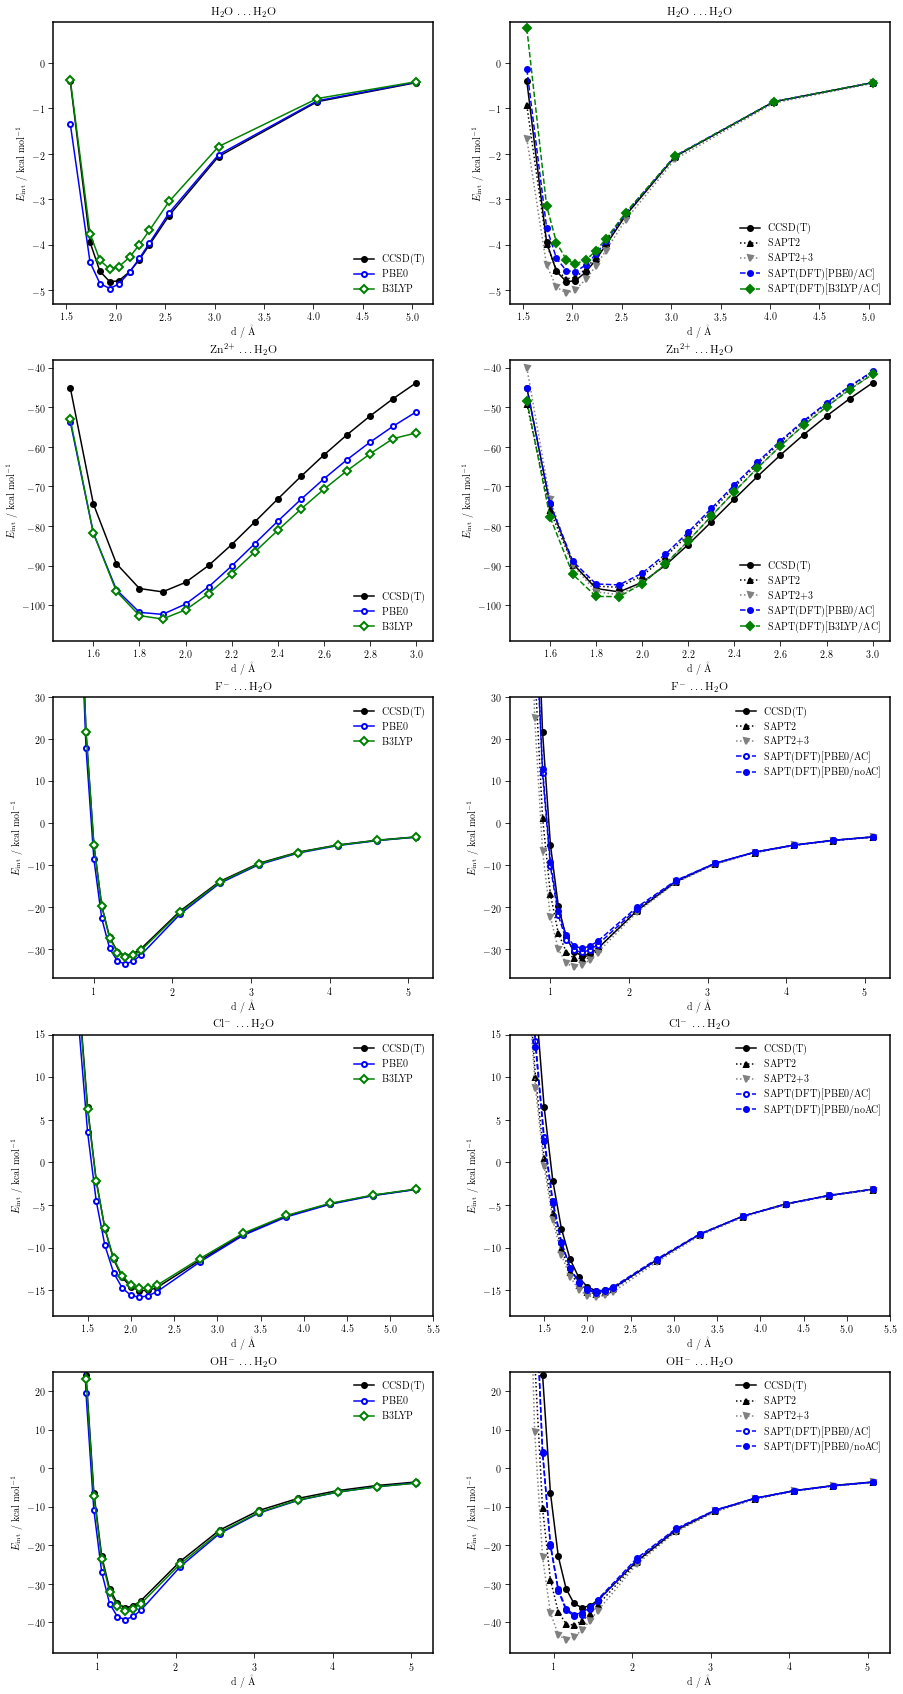

In [18]:
#cc_alpha = 0.4 # Control the alpha value of the CCSD(T) curves to stop them from being intrusive

Xlabel = 'd / \u00c5'
Ylabel = '$E_{\mathrm{int}}$ / kcal mol$^{-1}$'

#Eint2  = '$E\mathrm{_{int}^{[2]}}$'

#fig = plt.figure(figsize=(21,15)) # taille horizontale x verticale
fig, grph = plt.subplots(5, 2, figsize=(15,5*6))

##########
# H20..H2O
##########

grph[0, 0].plot(d['water2']['d'],cc_ref['water2']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[0, 0].plot(d['water2']['d'],dft_pbe0['water2']['Eint'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'PBE0')
grph[0, 0].plot(d['water2']['d'],dft_b3lyp['water2']['Eint'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'B3LYP')
grph[0, 0].set_xlabel(Xlabel)
grph[0, 0].set_ylabel(Ylabel)
grph[0, 0].set_ylim(-5.3,+0.9)
grph[0, 0].legend(loc='lower right',frameon=False)
grph[0, 0].set_title('H$_{2}$O \dots H$_{2}$O')

grph[0, 1].plot(d['water2']['d'],cc_ref['water2']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[0, 1].plot(d['water2']['d'],sapt2['water2']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'SAPT2')
grph[0, 1].plot(d['water2']['d'],sapt2p3['water2']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'SAPT2+3')
grph[0, 1].plot(d['water2']['d'],saptdft_pbe0['water2']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'SAPT(DFT)[PBE0/AC]')
grph[0, 1].plot(d['water2']['d'],saptdft_b3lyp['water2']['Eint'], 
                'g', linestyle='--', marker='D', markerfacecolor='g',
                label=r'SAPT(DFT)[B3LYP/AC]')
grph[0, 1].set_xlabel(Xlabel)
grph[0, 1].set_ylabel(Ylabel)
grph[0, 1].set_ylim(-5.3,+0.9)
grph[0, 1].legend(loc='lower right',frameon=False)
grph[0, 1].set_title('H$_{2}$O \dots H$_{2}$O')

##########
# Zn..H2O
##########
grph[1, 0].plot(d['zn_h2o']['d'],cc_ref['zn_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[1, 0].plot(d['zn_h2o']['d'],dft_pbe0['zn_h2o']['Eint'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'PBE0')
grph[1, 0].plot(d['zn_h2o']['d'],dft_b3lyp['zn_h2o']['Eint'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'B3LYP')
grph[1, 0].set_xlabel(Xlabel)
grph[1, 0].set_ylabel(Ylabel)
grph[1, 0].set_ylim(-109.0,-38.0)
grph[1, 0].legend(loc='lower right',frameon=False)
grph[1, 0].set_title('Zn$^{2+}$ \dots H$_{2}$O')

grph[1, 1].plot(d['zn_h2o']['d'],cc_ref['zn_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[1, 1].plot(d['zn_h2o']['d'],sapt2['zn_h2o']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'SAPT2')
grph[1, 1].plot(d['zn_h2o']['d'],sapt2p3['zn_h2o']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'SAPT2+3')
grph[1, 1].plot(d['zn_h2o']['d'],saptdft_pbe0['zn_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'SAPT(DFT)[PBE0/AC]')
grph[1, 1].plot(d['zn_h2o']['d'],saptdft_b3lyp['zn_h2o']['Eint'], 
                'g', linestyle='--', marker='D', markerfacecolor='g',
                label=r'SAPT(DFT)[B3LYP/AC]')
grph[1, 1].set_xlabel(Xlabel)
grph[1, 1].set_ylabel(Ylabel)
grph[1, 1].set_ylim(-109.0,-38.0)
grph[1, 1].legend(loc='lower right',frameon=False)
grph[1, 1].set_title('Zn$^{2+}$ \dots H$_{2}$O')

##########
# F..H2O
##########
grph[2, 0].plot(d['f_h2o']['d'],cc_ref['f_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[2, 0].plot(d['f_h2o']['d'],dft_pbe0['f_h2o']['SCF-TOT'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'PBE0')
grph[2, 0].plot(d['f_h2o']['d'],dft_b3lyp['f_h2o']['SCF-TOT'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'B3LYP')
grph[2, 0].set_xlabel(Xlabel)
grph[2, 0].set_ylabel(Ylabel)
grph[2, 0].set_ylim(-37.0,+30.0)
grph[2, 0].legend(loc='upper right',frameon=False)
grph[2, 0].set_title('F$^{-}$ \dots H$_{2}$O')

grph[2, 1].plot(d['f_h2o']['d'],cc_ref['f_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[2, 1].plot(d['f_h2o']['d'],sapt2['f_h2o']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'SAPT2')
grph[2, 1].plot(d['f_h2o']['d'],sapt2p3['f_h2o']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'SAPT2+3')
grph[2, 1].plot(d['f_h2o']['d'],saptdft_pbe0['f_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='white',
                label=r'SAPT(DFT)[PBE0/AC]')
grph[2, 1].plot(d['f_h2o']['d'],saptdft_pbe0_noac['f_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'SAPT(DFT)[PBE0/noAC]')
grph[2, 1].set_xlabel(Xlabel)
grph[2, 1].set_ylabel(Ylabel)
grph[2, 1].set_ylim(-37.0,+30.0)
grph[2, 1].legend(loc='upper right',frameon=False)
grph[2, 1].set_title('F$^{-}$ \dots H$_{2}$O')

##########
# Cl..H2O
##########
grph[3, 0].plot(d['cl_h2o']['d'],cc_ref['cl_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[3, 0].plot(d['cl_h2o']['d'],dft_pbe0['cl_h2o']['SCF-TOT'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'PBE0')
grph[3, 0].plot(d['cl_h2o']['d'],dft_b3lyp['cl_h2o']['SCF-TOT'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'B3LYP')
grph[3, 0].set_xlabel(Xlabel)
grph[3, 0].set_ylabel(Ylabel)
grph[3, 0].set_ylim(-18.0,+15.0)
grph[3, 0].legend(loc='upper right',frameon=False)
grph[3, 0].set_title('Cl$^{-}$ \dots H$_{2}$O')

grph[3, 1].plot(d['cl_h2o']['d'],cc_ref['cl_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[3, 1].plot(d['cl_h2o']['d'],sapt2['cl_h2o']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'SAPT2')
grph[3, 1].plot(d['cl_h2o']['d'],sapt2p3['cl_h2o']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'SAPT2+3')
grph[3, 1].plot(d['cl_h2o']['d'],saptdft_pbe0['cl_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='white',
                label=r'SAPT(DFT)[PBE0/AC]')
grph[3, 1].plot(d['cl_h2o']['d'],saptdft_pbe0_noac['cl_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'SAPT(DFT)[PBE0/noAC]')
grph[3, 1].set_xlabel(Xlabel)
grph[3, 1].set_ylabel(Ylabel)
grph[3, 1].set_ylim(-18.0,+15.0)
grph[3, 1].legend(loc='upper right',frameon=False)
grph[3, 1].set_title('Cl$^{-}$ \dots H$_{2}$O')

##########
# OH..H2O
##########
grph[4, 0].plot(d['oh_h2o']['d'],cc_ref['oh_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[4, 0].plot(d['oh_h2o']['d'],dft_pbe0['oh_h2o']['SCF-TOT'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'PBE0')
grph[4, 0].plot(d['oh_h2o']['d'],dft_b3lyp['oh_h2o']['SCF-TOT'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'B3LYP')
grph[4, 0].set_xlabel(Xlabel)
grph[4, 0].set_ylabel(Ylabel)
grph[4, 0].set_ylim(-48.0,+25.0)
grph[4, 0].legend(loc='upper right',frameon=False)
grph[4, 0].set_title('OH$^{-}$ \dots H$_{2}$O')

grph[4, 1].plot(d['oh_h2o']['d'],cc_ref['oh_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[4, 1].plot(d['oh_h2o']['d'],sapt2['oh_h2o']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'SAPT2')
grph[4, 1].plot(d['oh_h2o']['d'],sapt2p3['oh_h2o']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'SAPT2+3')
grph[4, 1].plot(d['oh_h2o']['d'],saptdft_pbe0['oh_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='white',
                label=r'SAPT(DFT)[PBE0/AC]')
grph[4, 1].plot(d['oh_h2o']['d'],saptdft_pbe0_noac['oh_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'SAPT(DFT)[PBE0/noAC]')
grph[4, 1].set_xlabel(Xlabel)
grph[4, 1].set_ylabel(Ylabel)
grph[4, 1].set_ylim(-48.0,+25.0)
grph[4, 1].legend(loc='upper right',frameon=False)
grph[4, 1].set_title('OH$^{-}$ \dots H$_{2}$O')

In [19]:
fig.savefig('TOT_SAPT_SAPTDFT_DFT_noAC_all.pdf')

Text(0.5, 1.0, 'Zn$^{2+}$ \\dots H$_{2}$O')

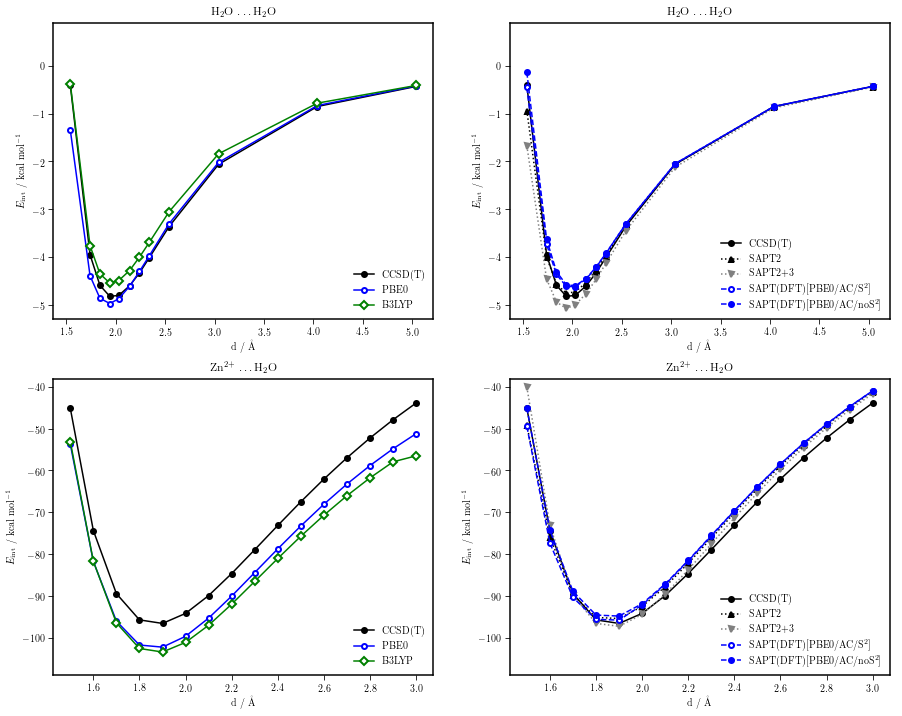

In [20]:
#cc_alpha = 0.4 # Control the alpha value of the CCSD(T) curves to stop them from being intrusive

Xlabel = 'd / \u00c5'
Ylabel = '$E_{\mathrm{int}}$ / kcal mol$^{-1}$'

#Eint2  = '$E\mathrm{_{int}^{[2]}}$'

#fig = plt.figure(figsize=(21,15)) # taille horizontale x verticale
fig, grph = plt.subplots(2, 2, figsize=(15,2*6))

##########
# H20..H2O
##########

grph[0, 0].plot(d['water2']['d'],cc_ref['water2']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[0, 0].plot(d['water2']['d'],dft_pbe0['water2']['Eint'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'PBE0')
grph[0, 0].plot(d['water2']['d'],dft_b3lyp['water2']['Eint'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'B3LYP')
grph[0, 0].set_xlabel(Xlabel)
grph[0, 0].set_ylabel(Ylabel)
grph[0, 0].set_ylim(-5.3,+0.9)
grph[0, 0].legend(loc='lower right',frameon=False)
grph[0, 0].set_title('H$_{2}$O \dots H$_{2}$O')

grph[0, 1].plot(d['water2']['d'],cc_ref['water2']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[0, 1].plot(d['water2']['d'],sapt2['water2']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'SAPT2')
grph[0, 1].plot(d['water2']['d'],sapt2p3['water2']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'SAPT2+3')
grph[0, 1].plot(d['water2']['d'],saptdft_pbe0_s2['water2']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='white',
                label=r'SAPT(DFT)[PBE0/AC/S$^2$]')
grph[0, 1].plot(d['water2']['d'],saptdft_pbe0['water2']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'SAPT(DFT)[PBE0/AC/noS$^2$]')
#grph[0, 1].plot(d['water2']['d'],saptdft_b3lyp['water2']['Eint'], 
     #           'g', linestyle='--', marker='D', markerfacecolor='g',
       #         label=r'SAPT(DFT)[B3LYP/AC/noS$^2$]')
grph[0, 1].set_xlabel(Xlabel)
grph[0, 1].set_ylabel(Ylabel)
grph[0, 1].set_ylim(-5.3,+0.9)
grph[0, 1].legend(loc='lower right',frameon=False)
grph[0, 1].set_title('H$_{2}$O \dots H$_{2}$O')

##########
# Zn..H2O
##########
grph[1, 0].plot(d['zn_h2o']['d'],cc_ref['zn_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[1, 0].plot(d['zn_h2o']['d'],dft_pbe0['zn_h2o']['Eint'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'PBE0')
grph[1, 0].plot(d['zn_h2o']['d'],dft_b3lyp['zn_h2o']['Eint'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'B3LYP')
grph[1, 0].set_xlabel(Xlabel)
grph[1, 0].set_ylabel(Ylabel)
grph[1, 0].set_ylim(-109.0,-38.0)
grph[1, 0].legend(loc='lower right',frameon=False)
grph[1, 0].set_title('Zn$^{2+}$ \dots H$_{2}$O')

grph[1, 1].plot(d['zn_h2o']['d'],cc_ref['zn_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[1, 1].plot(d['zn_h2o']['d'],sapt2['zn_h2o']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'SAPT2')
grph[1, 1].plot(d['zn_h2o']['d'],sapt2p3['zn_h2o']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'SAPT2+3')
grph[1, 1].plot(d['zn_h2o']['d'],saptdft_pbe0_s2['zn_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='white',
                label=r'SAPT(DFT)[PBE0/AC/S$^2$]')
grph[1, 1].plot(d['zn_h2o']['d'],saptdft_pbe0['zn_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'SAPT(DFT)[PBE0/AC/noS$^2$]')
#grph[1, 1].plot(d['zn_h2o']['d'],saptdft_b3lyp['zn_h2o']['Eint'], 
   #             'g', linestyle='--', marker='D', markerfacecolor='g',
      #          label=r'SAPT(DFT)[B3LYP/AC/noS$^2$]')
grph[1, 1].set_xlabel(Xlabel)
grph[1, 1].set_ylabel(Ylabel)
grph[1, 1].set_ylim(-109.0,-38.0)
grph[1, 1].legend(loc='lower right',frameon=False)
grph[1, 1].set_title('Zn$^{2+}$ \dots H$_{2}$O')


In [21]:
fig.savefig('TOT_SAPT_SAPTDFT_DFT_water2_zn-h2o_noS2.pdf')

Same for the anion..water interactions

Text(0.5, 1.0, 'OH$^{-}$ \\dots H$_{2}$O')

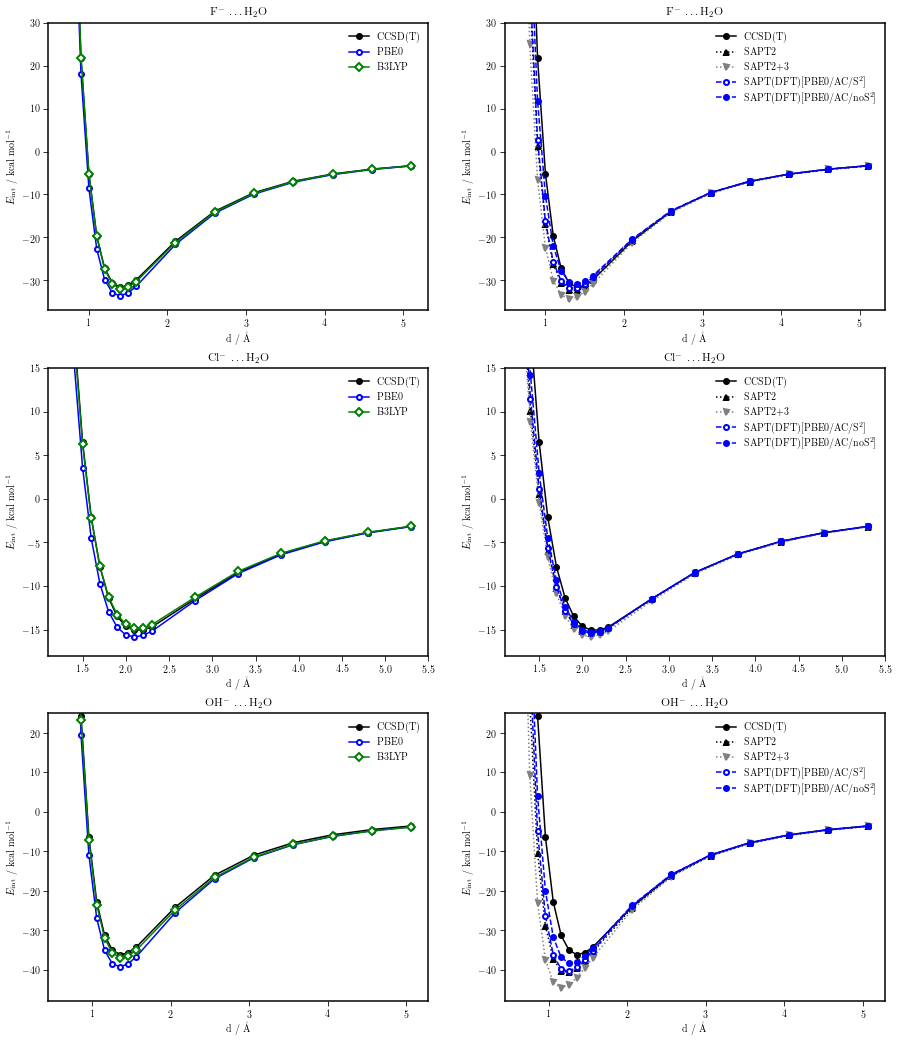

In [22]:
#cc_alpha = 0.4 # Control the alpha value of the CCSD(T) curves to stop them from being intrusive

Xlabel = 'd / \u00c5'
Ylabel = '$E_{\mathrm{int}}$ / kcal mol$^{-1}$'

#Eint2  = '$E\mathrm{_{int}^{[2]}}$'

#fig = plt.figure(figsize=(21,15)) # taille horizontale x verticale
fig, grph = plt.subplots(3, 2, figsize=(15,3*6))

##########
# F..H2O
##########
grph[0, 0].plot(d['f_h2o']['d'],cc_ref['f_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[0, 0].plot(d['f_h2o']['d'],dft_pbe0['f_h2o']['SCF-TOT'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'PBE0')
grph[0, 0].plot(d['f_h2o']['d'],dft_b3lyp['f_h2o']['SCF-TOT'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'B3LYP')
grph[0, 0].set_xlabel(Xlabel)
grph[0, 0].set_ylabel(Ylabel)
grph[0, 0].set_ylim(-37.0,+30.0)
grph[0, 0].legend(loc='upper right',frameon=False)
grph[0, 0].set_title('F$^{-}$ \dots H$_{2}$O')

grph[0, 1].plot(d['f_h2o']['d'],cc_ref['f_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[0, 1].plot(d['f_h2o']['d'],sapt2['f_h2o']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'SAPT2')
grph[0, 1].plot(d['f_h2o']['d'],sapt2p3['f_h2o']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'SAPT2+3')
grph[0, 1].plot(d['f_h2o']['d'],saptdft_pbe0_s2['f_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='white',
                label=r'SAPT(DFT)[PBE0/AC/S$^2$]')
grph[0, 1].plot(d['f_h2o']['d'],saptdft_pbe0['f_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'SAPT(DFT)[PBE0/AC/noS$^2$]')
grph[0, 1].set_xlabel(Xlabel)
grph[0, 1].set_ylabel(Ylabel)
grph[0, 1].set_ylim(-37.0,+30.0)
grph[0, 1].legend(loc='upper right',frameon=False)
grph[0, 1].set_title('F$^{-}$ \dots H$_{2}$O')

##########
# Cl..H2O
##########
grph[1, 0].plot(d['cl_h2o']['d'],cc_ref['cl_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[1, 0].plot(d['cl_h2o']['d'],dft_pbe0['cl_h2o']['SCF-TOT'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'PBE0')
grph[1, 0].plot(d['cl_h2o']['d'],dft_b3lyp['cl_h2o']['SCF-TOT'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'B3LYP')
grph[1, 0].set_xlabel(Xlabel)
grph[1, 0].set_ylabel(Ylabel)
grph[1, 0].set_ylim(-18.0,+15.0)
grph[1, 0].legend(loc='upper right',frameon=False)
grph[1, 0].set_title('Cl$^{-}$ \dots H$_{2}$O')

grph[1, 1].plot(d['cl_h2o']['d'],cc_ref['cl_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[1, 1].plot(d['cl_h2o']['d'],sapt2['cl_h2o']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'SAPT2')
grph[1, 1].plot(d['cl_h2o']['d'],sapt2p3['cl_h2o']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'SAPT2+3')
grph[1, 1].plot(d['cl_h2o']['d'],saptdft_pbe0_s2['cl_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='white',
                label=r'SAPT(DFT)[PBE0/AC/S$^2$]')
grph[1, 1].plot(d['cl_h2o']['d'],saptdft_pbe0['cl_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'SAPT(DFT)[PBE0/AC/noS$^2$]')
grph[1, 1].set_xlabel(Xlabel)
grph[1, 1].set_ylabel(Ylabel)
grph[1, 1].set_ylim(-18.0,+15.0)
grph[1, 1].legend(loc='upper right',frameon=False)
grph[1, 1].set_title('Cl$^{-}$ \dots H$_{2}$O')

##########
# OH..H2O
##########
grph[2, 0].plot(d['oh_h2o']['d'],cc_ref['oh_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[2, 0].plot(d['oh_h2o']['d'],dft_pbe0['oh_h2o']['SCF-TOT'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'PBE0')
grph[2, 0].plot(d['oh_h2o']['d'],dft_b3lyp['oh_h2o']['SCF-TOT'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'B3LYP')
grph[2, 0].set_xlabel(Xlabel)
grph[2, 0].set_ylabel(Ylabel)
grph[2, 0].set_ylim(-48.0,+25.0)
grph[2, 0].legend(loc='upper right',frameon=False)
grph[2, 0].set_title('OH$^{-}$ \dots H$_{2}$O')

grph[2, 1].plot(d['oh_h2o']['d'],cc_ref['oh_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph[2, 1].plot(d['oh_h2o']['d'],sapt2['oh_h2o']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'SAPT2')
grph[2, 1].plot(d['oh_h2o']['d'],sapt2p3['oh_h2o']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'SAPT2+3')
grph[2, 1].plot(d['oh_h2o']['d'],saptdft_pbe0_s2['oh_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='white',
                label=r'SAPT(DFT)[PBE0/AC/S$^2$]')
grph[2, 1].plot(d['oh_h2o']['d'],saptdft_pbe0['oh_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'SAPT(DFT)[PBE0/AC/noS$^2$]')
grph[2, 1].set_xlabel(Xlabel)
grph[2, 1].set_ylabel(Ylabel)
grph[2, 1].set_ylim(-48.0,+25.0)
grph[2, 1].legend(loc='upper right',frameon=False)
grph[2, 1].set_title('OH$^{-}$ \dots H$_{2}$O')

In [23]:
fig.savefig('TOT_SAPT_SAPTDFT_DFT_anion-h2o_noS2.pdf')

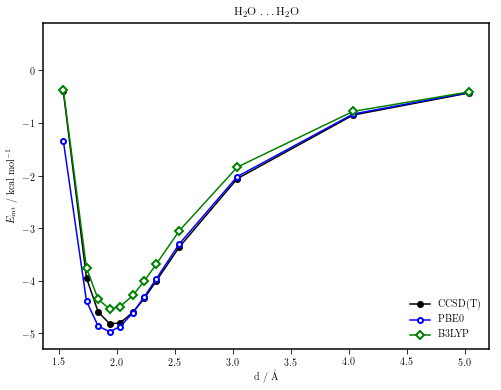

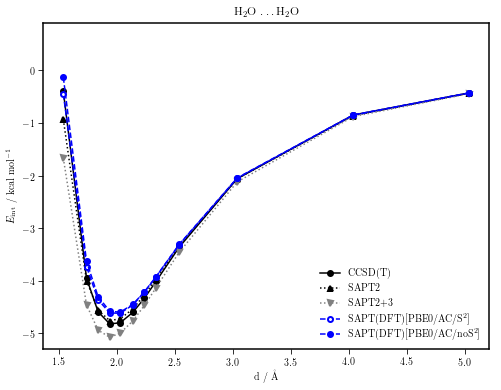

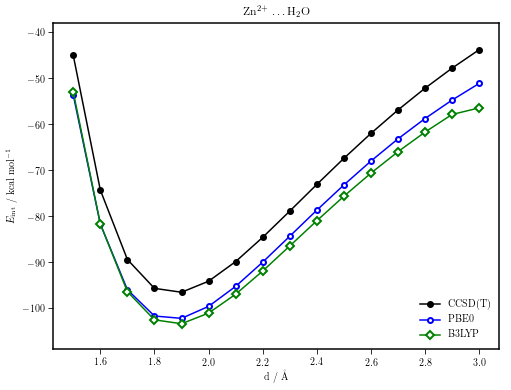

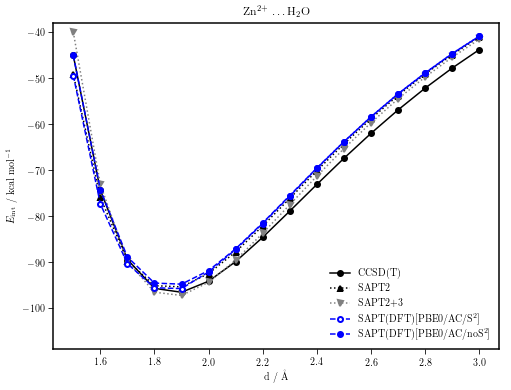

In [34]:
#cc_alpha = 0.4 # Control the alpha value of the CCSD(T) curves to stop them from being intrusive

Xlabel = 'd / \u00c5'
Ylabel = '$E_{\mathrm{int}}$ / kcal mol$^{-1}$'

#Eint2  = '$E\mathrm{_{int}^{[2]}}$'

#fig = plt.figure(figsize=(21,15)) # taille horizontale x verticale
#fig, grph = plt.subplots(2, 2, figsize=(15,2*6))

##########
# H20..H2O
##########
fig1 = plt.figure(figsize=(8,6))
grph1 = fig1.add_subplot(111)

grph1.plot(d['water2']['d'],cc_ref['water2']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph1.plot(d['water2']['d'],dft_pbe0['water2']['Eint'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'PBE0')
grph1.plot(d['water2']['d'],dft_b3lyp['water2']['Eint'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'B3LYP')
grph1.set_xlabel(Xlabel)
grph1.set_ylabel(Ylabel)
grph1.set_ylim(-5.3,+0.9)
grph1.legend(loc='lower right',frameon=False)
grph1.set_title('H$_{2}$O \dots H$_{2}$O')
fig1.savefig('water_eda_tot.eps')


fig2 = plt.figure(figsize=(8,6))
grph2 = fig2.add_subplot(111)
grph2.plot(d['water2']['d'],cc_ref['water2']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph2.plot(d['water2']['d'],sapt2['water2']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'SAPT2')
grph2.plot(d['water2']['d'],sapt2p3['water2']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'SAPT2+3')
grph2.plot(d['water2']['d'],saptdft_pbe0_s2['water2']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='white',
                label=r'SAPT(DFT)[PBE0/AC/S$^2$]')
grph2.plot(d['water2']['d'],saptdft_pbe0['water2']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'SAPT(DFT)[PBE0/AC/noS$^2$]')
#grph2.plot(d['water2']['d'],saptdft_b3lyp['water2']['Eint'], 
     #           'g', linestyle='--', marker='D', markerfacecolor='g',
       #         label=r'SAPT(DFT)[B3LYP/AC/noS$^2$]')
grph2.set_xlabel(Xlabel)
grph2.set_ylabel(Ylabel)
grph2.set_ylim(-5.3,+0.9)
grph2.legend(loc='lower right',frameon=False)
grph2.set_title('H$_{2}$O \dots H$_{2}$O')
fig2.savefig('water_sapt_tot.eps')


##########
# Zn..H2O
##########
fig3 = plt.figure(figsize=(8,6))
grph3 = fig3.add_subplot(111)
grph3.plot(d['zn_h2o']['d'],cc_ref['zn_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph3.plot(d['zn_h2o']['d'],dft_pbe0['zn_h2o']['Eint'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'PBE0')
grph3.plot(d['zn_h2o']['d'],dft_b3lyp['zn_h2o']['Eint'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'B3LYP')
grph3.set_xlabel(Xlabel)
grph3.set_ylabel(Ylabel)
grph3.set_ylim(-109.0,-38.0)
grph3.legend(loc='lower right',frameon=False)
grph3.set_title('Zn$^{2+}$ \dots H$_{2}$O')
fig3.savefig('zn_eda_tot.eps')

fig4 = plt.figure(figsize=(8,6))
grph4 = fig4.add_subplot(111)
grph4.plot(d['zn_h2o']['d'],cc_ref['zn_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'CCSD(T)')
grph4.plot(d['zn_h2o']['d'],sapt2['zn_h2o']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'SAPT2')
grph4.plot(d['zn_h2o']['d'],sapt2p3['zn_h2o']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'SAPT2+3')
grph4.plot(d['zn_h2o']['d'],saptdft_pbe0_s2['zn_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='white',
                label=r'SAPT(DFT)[PBE0/AC/S$^2$]')
grph4.plot(d['zn_h2o']['d'],saptdft_pbe0['zn_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'SAPT(DFT)[PBE0/AC/noS$^2$]')
#grph4.plot(d['zn_h2o']['d'],saptdft_b3lyp['zn_h2o']['Eint'], 
   #             'g', linestyle='--', marker='D', markerfacecolor='g',
      #          label=r'SAPT(DFT)[B3LYP/AC/noS$^2$]')
grph4.set_xlabel(Xlabel)
grph4.set_ylabel(Ylabel)
grph4.set_ylim(-109.0,-38.0)
grph4.legend(loc='lower right',frameon=False)
grph4.set_title('Zn$^{2+}$ \dots H$_{2}$O')
fig4.savefig('zn_sapt_tot.eps')